In [1]:
import numpy as np 
import pandas as pd 
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from numpy_neural_net import NeuralNet

# Data Import

In [2]:
# Open the HDF5 file
def open_hdf5(path):
    with h5py.File(path, 'r') as file:
        # Initialize dictionaries to store the arrays
        groups_arrays = {}

        # Iterate over each group in the file
        for group_name, group in file.items():
            # Convert the dataset in the group to a NumPy array
            dataset_array = np.array(group)

            # Store the array in the dictionary
            groups_arrays[group_name] = dataset_array
    
    return groups_arrays

In [3]:
groups_arrays_training = open_hdf5('datasets/train_catvnoncat.h5')
groups_arrays_test = open_hdf5('datasets/test_catvnoncat.h5')

In [4]:
train_set_x_orig = groups_arrays_training['train_set_x']
train_set_y = groups_arrays_training['train_set_y'].reshape(1, -1)
test_set_x_orig = groups_arrays_test['test_set_x']
test_set_y = groups_arrays_test['test_set_y'].reshape(1, -1)

y = [1]


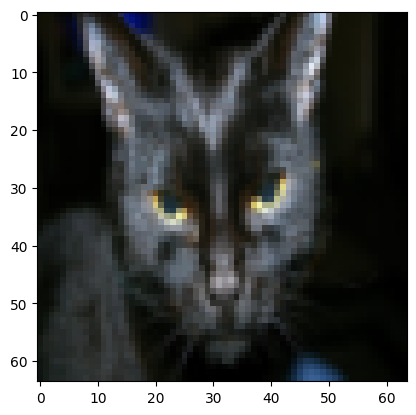

In [5]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]))

In [6]:
# Flatten the images
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_set_x = train_x_flatten/255.
test_set_x = test_x_flatten/255.

In [7]:
train_set_x.shape

(12288, 209)

# Training

In [23]:
layers = [train_set_x.shape[0], 20, 7, 5, train_set_y.shape[0]]
cat_or_not = NeuralNet(X_train=train_set_x, Y_train=train_set_y, layer_dims=layers, type='binary classification')

In [24]:
cat_or_not.train_neural_network(training_epochs=3000, learning_rate=0.021)

Epoch 0 cost: 0.7121076067062357
Epoch 100 cost: 0.66109480505091
Epoch 200 cost: 0.6499064329139908
Epoch 300 cost: 0.6459286258903367
Epoch 400 cost: 0.644385094807699
Epoch 500 cost: 0.643685640911132
Epoch 600 cost: 0.6432151713332501
Epoch 700 cost: 0.6427993809394461
Epoch 800 cost: 0.6423525305758871
Epoch 900 cost: 0.6418179421217237
Epoch 1000 cost: 0.6410931319312069
Epoch 1100 cost: 0.6398844642183898
Epoch 1200 cost: 0.638072469322587
Epoch 1300 cost: 0.634809156274312
Epoch 1400 cost: 0.6283483419524764
Epoch 1500 cost: 0.6158801565213936
Epoch 1600 cost: 0.5896232322660174
Epoch 1700 cost: 0.5341277429311024
Epoch 1800 cost: 0.4741895714035069
Epoch 1900 cost: 0.4185296174321459
Epoch 2000 cost: 0.3534350764711017
Epoch 2100 cost: 0.22966844465207417
Epoch 2200 cost: 0.18597188905834858
Epoch 2300 cost: 0.12054331245567469
Epoch 2400 cost: 0.10646224363036451
Epoch 2500 cost: 0.047297101994457205
Epoch 2600 cost: 0.017432644470085707
Epoch 2700 cost: 0.008887196558083177


Text(0, 0.5, 'Cost')

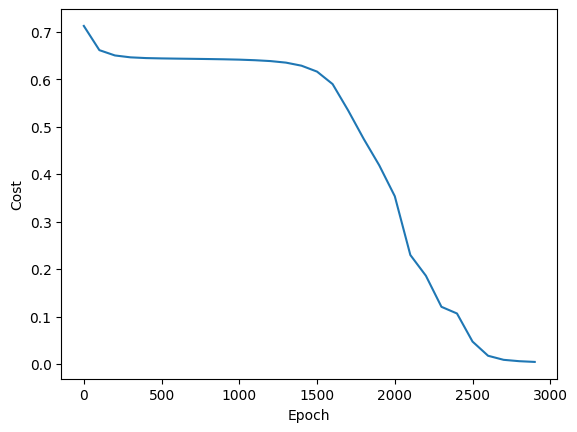

In [25]:
plt.plot(np.arange(0, cat_or_not.training_epochs, 100), cat_or_not.training_costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')

# Predicting

In [26]:
train_predictions = cat_or_not.predict(train_set_x)
print("The train accuracy is ", accuracy_score(train_set_y[0, :], train_predictions[0, :]))

The train accuracy is  1.0


In [27]:
test_predictions = cat_or_not.predict(test_set_x)
print("The test accuracy is ", accuracy_score(test_set_y[0, :], test_predictions[0, :]))

The test accuracy is  0.72


# Examples

In [66]:
right_predictions = np.where(test_set_y[0, :] == test_predictions[0, :])[0]
wrong_predictions = np.where(test_set_y[0, :] != test_predictions[0, :])[0]

Some correct predictions

predicted y = [1]


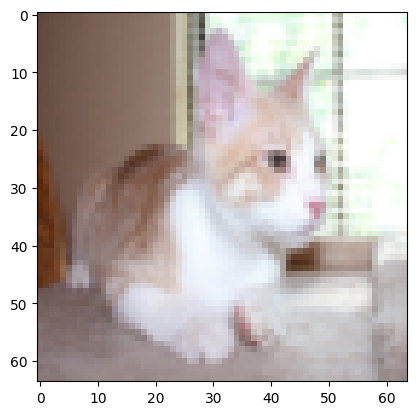

In [87]:
# Example of a picture
ii=3
plt.imshow(test_set_x_orig[right_predictions[ii]])
print ("predicted y = " + str(test_predictions[:, right_predictions[ii]]))

Some wrong predictions

predicted y = [1]


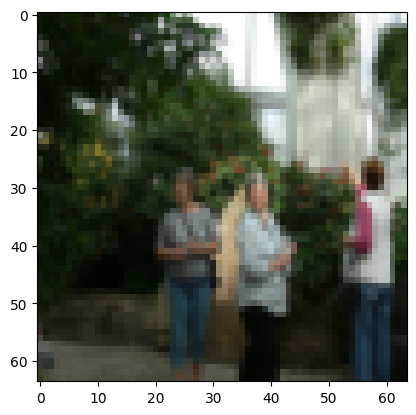

In [74]:
# Example of a picture
ii=5
plt.imshow(test_set_x_orig[wrong_predictions[ii]])
print ("predicted y = " + str(test_predictions[:, wrong_predictions[ii]]))